**UnderStanding Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/Titanic Survival U16955478860.csv")

In [ ]:
data = df.copy()

In [ ]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.duplicated().sum()

0

**Describe Data**

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Exploratory Data Analysis (EDA)**

In [ ]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

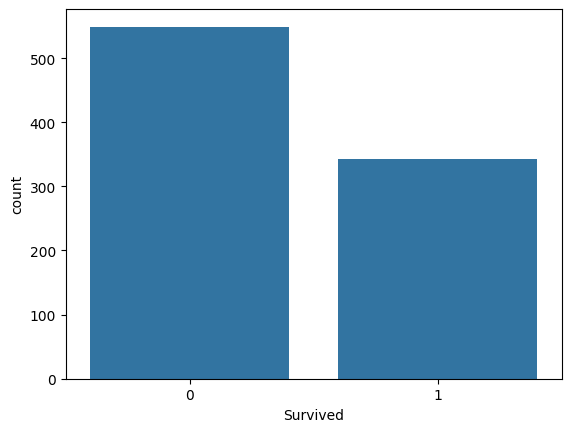

In [ ]:
sns.barplot(data["Survived"].value_counts())

In [ ]:
#pesenger Class

data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

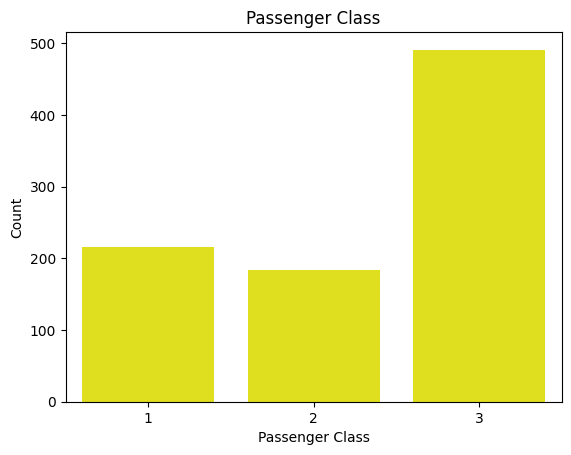

In [ ]:
sns.barplot(data["Pclass"].value_counts(),color="yellow")
plt.title("Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

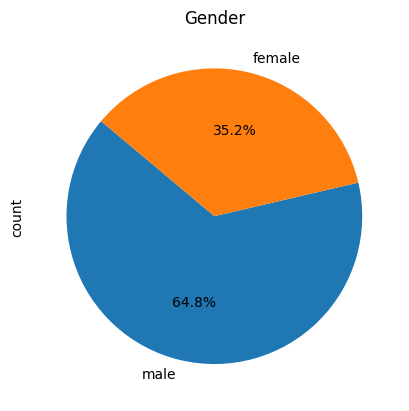

In [ ]:
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Gender")
plt.show()

<Axes: ylabel='count'>

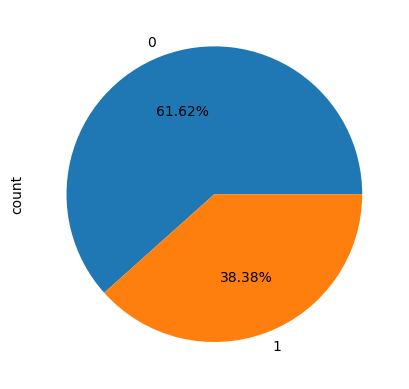

In [ ]:
data['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')

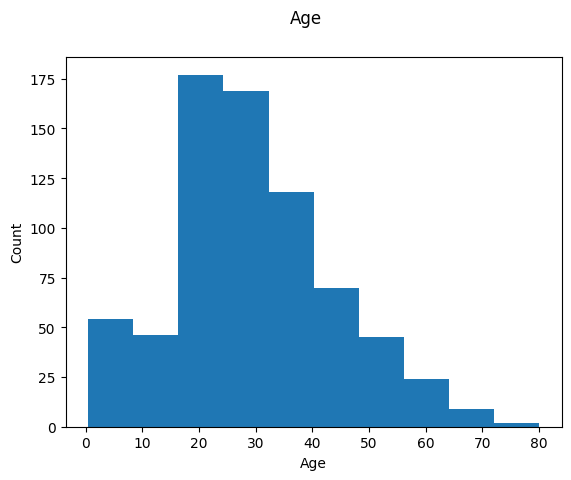

In [ ]:
plt.hist(data['Age'])
plt.suptitle("Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Age'>

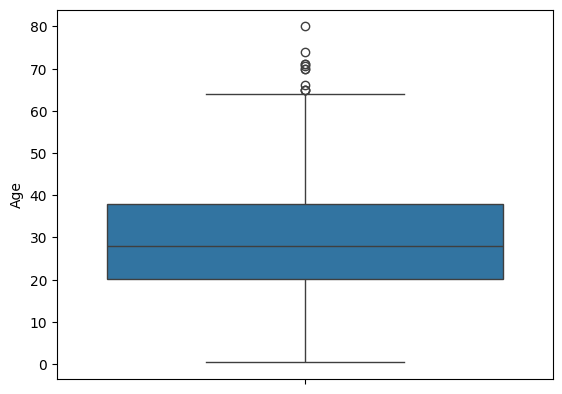

In [ ]:
sns.boxplot(data['Age'])

**Feature Engineering**

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data = data.drop("Cabin",axis=1)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
data.drop("Name",axis=1,inplace=True)

In [ ]:
data["Age"].median()

28.0

In [ ]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [ ]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.drop("Ticket",axis=1,inplace = True)

KeyError: "['Ticket'] not found in axis"

In [ ]:
data.shape

(891, 9)

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Encoder = LabelEncoder()

In [ ]:
data["Sex"] = Encoder.fit_transform(data["Sex"])

In [ ]:
data["Embarked"] = Encoder.fit_transform(data["Embarked"] )

In [ ]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


**Building Model**

In [ ]:
x = data.drop("Survived",axis=1)

In [ ]:
y = data["Survived"]

In [ ]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,1,45.5,0,0,28.5000,2
733,734,2,1,23.0,0,0,13.0000,2
382,383,3,1,32.0,0,0,7.9250,2
704,705,3,1,26.0,1,0,7.8542,2
813,814,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...,...
106,107,3,0,21.0,0,0,7.6500,2
270,271,1,1,28.0,0,0,31.0000,2
860,861,3,1,41.0,2,0,14.1083,2
435,436,1,0,14.0,1,2,120.0000,2


In [ ]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

**Logistic Regression Model**

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_train,y_train)

0.7963483146067416

In [ ]:
model.score(x_test,y_test)

0.776536312849162

In [ ]:
pred_y = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,pred_y)

array([[88, 17],
       [23, 51]])

In [ ]:
c= confusion_matrix(y_test,pred_y)

<Axes: >

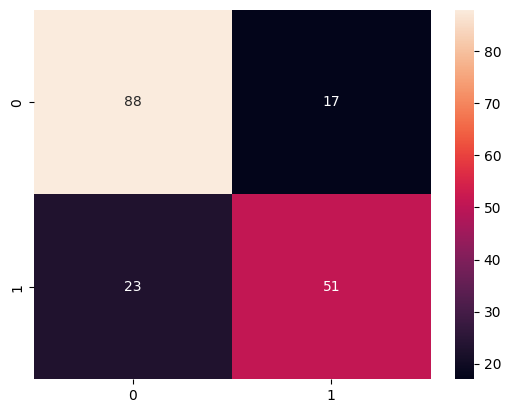

In [ ]:
sns.heatmap(c,annot=True)

In [ ]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1 = DecisionTreeClassifier()

In [ ]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model1.score(x_train,y_train)

1.0

In [ ]:
model1.score(x_test,y_test)

0.770949720670391

In [ ]:
pred_y1= model1.predict(x_test)